# Homework 2 ——Climate Change
### 1801212920 史云霞

### Problem 1 —Creating Your First Model

We are interested in how changes in these variables affect future temperatures, as well
as how well these variables explain temperature changes so far. To do this, first read the
dataset climate_change_1.csv into Python or Matlab.

Then, split the data into a training set, consisting of all the observations up to and
including 2006, and a testing set consisting of the remaining years. A training set refers
to the data that will be used to build the model, and a testing set refers to the data we
will use to test our predictive ability

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
climate_change_1 = pd.read_csv("climate_change_1.csv")
climate_change_1.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [3]:
training_set = climate_change_1[climate_change_1['Year'] <= 2006]
testing_set = climate_change_1[climate_change_1['Year'] > 2006]

We can apply a linear regression model. Though being a little doubtful, you decide to have a try. To
solve the linear regression problem, you recall the linear regression has a closed form
solution.

\begin{array}{ll} \mbox{} & \theta = (X^T X)^{-1} X^X Y
\end{array}

#### 1. Implement a function closed_form_1 that computes this closed form solution given the features X, labels Y (using Python or Matlab).

In [4]:
def closed_form_1(X, Y):
    X = np.hstack((np.ones([X.shape[0], 1]), X)) # intercept
    theta = np.linalg.inv(X.T @ X) @ X.T @ Y
    
    MSE = (Y - X@theta).T @ (Y - X@theta) / (X.shape[0]-X.shape[1])
    t_stat = theta / (np.sqrt(MSE * np.diag(np.linalg.inv(X.T @ X))))
    return theta, t_stat

#### 2. Write down the mathematical formula for the linear model and evaluate the model R2 on the training set and the testing set.

Linear model:
\begin{array}{ll} \mbox{} & Y = X \theta + \epsilon, \epsilon \sim (0, \sigma^2 I)
\end{array}

In [5]:
def R2(Y, Y_predict):
    SST = np.sum((Y - Y.mean())**2)
    SSR = np.sum((Y_predict - Y.mean())**2)
    return SSR / SST

In [6]:
theta, t_stat = closed_form_1(training_set.loc[:, "MEI":"Aerosols"].values, training_set["Temp"].values)
y_predict = training_set.loc[:, "MEI":"Aerosols"] @ theta[1:] + theta[0]
R2_training = R2(training_set["Temp"], y_predict)

y_predict = testing_set.loc[:, "MEI":"Aerosols"] @ theta[1:] + theta[0]
R2_testing = R2(testing_set["Temp"], y_predict)

print("The model R2 on the training set and the testing set are %f and %f." % (R2_training, R2_testing))

The model R2 on the training set and the testing set are 0.750893 and 0.225177.


#### 3. Which variables are significant in the model?

In [7]:
theta, t_stat

(array([-1.24594261e+02,  6.42053134e-02,  6.45735927e-03,  1.24041896e-04,
        -1.65280033e-02, -6.63048889e-03,  3.80810324e-03,  9.31410838e-02,
        -1.53761324e+00]),
 array([-6.26517396,  9.923226  ,  2.8264197 ,  0.2404694 , -1.92972604,
        -4.07783387,  3.75729271,  6.31256095, -7.21030085]))

In [8]:
training_set.loc[:, "MEI":"Aerosols"].columns[np.abs(t_stat[1:]) >= 2]

Index(['MEI', 'CO2', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols'], dtype='object')

From above result, we can see that MEI, CO2, CFC-11, CFC-12, TSI and Aerosols variables are significant.

#### 4. Write down the necessary conditions for using the closed form solution. And you can apply it to the dataset climate_change_2.csv, explain the solution is unreasonable

Necessary condition for using the closed form solution is that X'X is invertible, which means there can't be redundant varibles or too many variables.

In [9]:
climate_change_2 = pd.read_csv("climate_change_2.csv")
training_set2 = climate_change_2[climate_change_2['Year'] <= 2006]
testing_set2 = climate_change_2[climate_change_2['Year'] > 2006]

In [10]:
theta, t_stat = closed_form_1(training_set2.loc[:, "MEI":"NO"].values, training_set2["Temp"].values)
print(theta, "\n", t_stat)

[-6.80264006e+01  6.76756906e-02  5.95210064e-03  5.64175439e-02
 -1.65280032e-02 -6.63048889e-03  3.80810324e-03  9.31410841e-02
 -1.53761324e+00 -5.62567601e+01] 
 [-1.72117564e-04  4.40545033e+00  1.09730578e+00  1.42745318e-04
 -8.12776911e-01 -1.71753355e+00  1.58252555e+00  2.65877315e+00
 -3.03689017e+00 -1.42338510e-04]


When applying closed form solution to the dataset climate_change_2.csv, we can see that the abs(coefficient) of NO variable is relatively high compared with others and the t statistics is not significant. So this solution is unreasonable to this dataset.

In [11]:
X = training_set2.loc[:, "MEI":"NO"].values.copy()
X = np.hstack((np.ones([X.shape[0], 1]), X))
print("The eigen values of X'X in climate_change_2: \n", np.linalg.eig(X.T @ X)[0])

The eigen values of X'X in climate_change_2: 
 [1.54850519e+09 9.67853660e+05 4.51064771e+04 1.26018339e+04
 1.58821305e+03 2.37501085e+02 1.07887353e+02 1.89444365e-01
 4.25347852e-05 5.08673684e-11]


We can see that some eigen values of X'X in climate_change_2 is very close to 0, which indicates there may be
strong multicollinearity problems and makes the solution unreasonable.

### Problem 2 — Regularization
Regularization is a method to boost robustness of model, including L1 regularization
and L2 regularization.

#### 1. Please write down the loss function for linear model with L1 regularization, L2 regularization, respectively.

* The loss function for linear model with L1 regularization
\begin{array}{ll} \mbox{} & loss = 1/2 (Y - X \theta)^ T (Y - X \theta) + \lambda ||\theta||_1
\end{array}

* The loss function for linear model with L2 regularization
\begin{array}{ll} \mbox{} & loss = 1/2(Y - X \theta)^ T (Y - X \theta) + 1/2 \lambda ||\theta||_2^2
\end{array}

#### 2. The closed form solution for linear model with L2 regularization:
\begin{array}{ll} \mbox{} & \theta = (X^T X + \lambda I)^{-1} X^T Y
\end{array}

where I is the identity matrix. Write a function closed_form_2 that computes this
closed form solution given the features X, labels Y and the regularization
parameter λ (using Python or Matlab).

In [13]:
def closed_form_2(X, Y, lam=0):
    X = np.hstack((np.ones([X.shape[0], 1]), X))
    temp = lam*np.eye(X.shape[1])
#     temp[0, 0] = 1
    theta = np.linalg.inv(X.T @ X + temp) @ X.T @ Y
    
    MSE = (Y - X@theta).T @ (Y - X@theta) / (X.shape[0]-X.shape[1])
    t_stat = theta / (np.sqrt(MSE * np.diag(np.linalg.inv(X.T @ X))))
    return theta, t_stat

#### 3. Compare the two solutions in problem 1 and problem 2 and explain the reason why linear model with L2 regularization is robust. (using climate_change_1.csv)

In [14]:
theta1, t_stat1 = closed_form_1(training_set.loc[:, "MEI":"Aerosols"].values, training_set["Temp"].values)
theta2, t_stat2 = closed_form_2(training_set.loc[:, "MEI":"Aerosols"].values, training_set["Temp"].values, lam=10)
print("The 2 norm of coefficients in OSL regression is", np.sum(theta1[1:]**2))
print("The 2 norm of coefficients in ridge regression is", np.sum(theta2[1:]**2))

The 2 norm of coefficients in OSL regression is 2.3774254085768325
The 2 norm of coefficients in ridge regression is 0.002621399210510632


We can see that the 2 norm of coefficients in ridge regression is much smaller than that in OLS regression, which means the predicted y will be less sensitive to the change of the features. So ridge regression is more robust.

#### 4. You can change the regularization parameter λ to get different solutions for this problem. 
Suppose we set λ = 10, 1, 0.1, 0.01, 0.001, and please evaluate the
model R2 on the training set and the testing set. Finally, please decide the best
regularization parameter λ. (Note that: As a qualified data analyst, you must
know how to choose model parameters, please learn about cross validation
methods.)

In [15]:
lam_all = [0, 0.01, 0.1, 1, 10, 20]
# lam_all = [10, 1, 0.1]
R2_training, R2_testing = [], []
for each in lam_all:
    theta, t_stat = closed_form_2(training_set.loc[:, "MEI":"Aerosols"].values, training_set["Temp"].values, lam=each)
    y_predict = training_set.loc[:, "MEI":"Aerosols"] @ theta[1:] + theta[0]
    R2_training.append(R2(training_set["Temp"], y_predict))

    y_predict = testing_set.loc[:, "MEI":"Aerosols"] @ theta[1:] + theta[0]
    R2_testing.append(R2(testing_set["Temp"], y_predict))

In [16]:
pd.DataFrame([R2_training, R2_testing], index=["R2 traning", "R2 testing"], columns=lam_all)

,0.0,0.01,0.1,1.0,10.0,20.0
R2 traning,0.750893,0.711653,0.694468,0.679469,0.674608,0.670752
R2 testing,0.225177,0.585276,0.673288,0.846750,0.940872,0.985088


Use 5-fold cross validation method to choose the model with the lowest Mean Square error in validation set.

In [17]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
kf = KFold(n_splits=5)

X = training_set.loc[:, "MEI":"Aerosols"].values
y = training_set["Temp"].values

lam_all = [0, 0.001, 0.01, 0.1, 1, 10, 20]
MSE_training = []
MSE_validation = []
MSE_test = []
for each in lam_all:
    MSE_training_here = 0 
    MSE_validation_here = 0 
    MSE_test_here = 0
    for train_index, test_index in kf.split(y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        theta, t_stat = closed_form_2(X_train, y_train, lam=each)
        y_predict = X_train @ theta[1:] + theta[0]
        MSE_training_here += mean_squared_error(y_train, y_predict)
        y_predict = X_test @ theta[1:] + theta[0]
        MSE_validation_here += mean_squared_error(y_test, y_predict)
        MSE_test_here += mean_squared_error(testing_set["Temp"].values, testing_set.loc[:, "MEI":"Aerosols"].values @ theta[1:] + theta[0])
    
    MSE_training.append(MSE_training_here / 5)
    MSE_validation.append(MSE_validation_here / 5)
    MSE_test.append(MSE_test_here / 5)

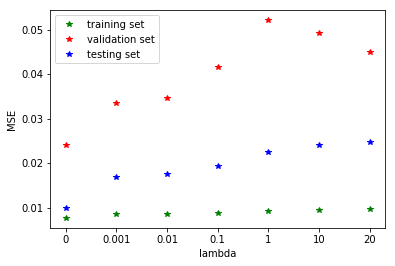

In [18]:
fig, ax = plt.subplots()
ax.plot(MSE_training, 'g*', label="training set")
ax.plot(MSE_validation, 'r*', label="validation set")
ax.plot(MSE_test, 'b*', label="testing set")
ax.set_xlabel("lambda")
ax.set_ylabel("MSE")
ax.set_xticks(np.arange(len(lam_all)))
ax.set_xticklabels(lam_all)
ax.legend()
plt.show()

MSE is minimized in validation set when lambda equals to 0. Lambda = 0 also performs well in testing set.

### Problem 3 — Feature Selection

#### 1. From Problem 1, you can know which variables are significant, therefore you can use less variables to train model. For example, remove highly correlated and redundant features. You can propose a workflow to select feature.


### Workflow:
* Find the features with high correlation coefficients.
* Calculate the importance of these features using variance analyses, Pearson correlation and tree-based feature selection.
* Drop the features which are highly correlated with others (from step1) and not so important (from step2).

#### 2. Train a better model than the model in Problem 2.

There are eight initial features. First, I will find the features with high correlation coefficients.

In [27]:
training_set.head(2)

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118


In [36]:
X = training_set.loc[:, "MEI":"Aerosols"]
y = training_set["Temp"]

In [37]:
print(np.corrcoef(X.T))

[[ 1.         -0.04114717 -0.0334193  -0.05081978  0.06900044  0.00828554
  -0.15449192  0.34023779]
 [-0.04114717  1.          0.87727963  0.97671982  0.51405975  0.85268963
   0.17742893 -0.3561548 ]
 [-0.0334193   0.87727963  1.          0.89983864  0.77990402  0.96361625
   0.24552844 -0.26780919]
 [-0.05081978  0.97671982  0.89983864  1.          0.52247732  0.86793078
   0.19975668 -0.33705457]
 [ 0.06900044  0.51405975  0.77990402  0.52247732  1.          0.86898518
   0.27204596 -0.0439212 ]
 [ 0.00828554  0.85268963  0.96361625  0.86793078  0.86898518  1.
   0.25530281 -0.22513124]
 [-0.15449192  0.17742893  0.24552844  0.19975668  0.27204596  0.25530281
   1.          0.05211651]
 [ 0.34023779 -0.3561548  -0.26780919 -0.33705457 -0.0439212  -0.22513124
   0.05211651  1.        ]]


From above result, we can see that there are high relationship among CO2, CH4, N2O, CFC-11 and CFC-12 variables. Next, I will calculate the importance of these features using variance analyses, Pearson correlation and tree-based feature selection.

In [38]:
# Filter method 1: Removing features with low variance
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=3).fit(training_set.loc[:, "MEI":"Aerosols"])
print("Variance: \n", selector.variances_)

Variance: 
 [8.61185079e-01 1.30405741e+02 2.07839066e+03 2.25637109e+01
 4.38931351e+02 3.47422945e+03 1.60460862e-01 8.97671505e-04]


In [39]:
# Filter method 2: Univariate feature selection——Pearson Correlation
from scipy.stats import pearsonr
corr, corr_p = [], []
for pos in range(X.shape[1]):
    result = pearsonr(X.iloc[:, pos], y)
    corr.append(result[0])
    corr_p.append(result[1])
    
print("corr: \n", corr)
print("p_value: \n", corr_p)

corr: 
 [0.1724707512381389, 0.7885292093308759, 0.703255021650043, 0.7786389297717538, 0.40771028965805495, 0.6875575482940205, 0.2433826874052623, -0.38491374619822105]
p_value: 
 [0.0035501728764938175, 1.7415402024355552e-61, 1.1072852344421367e-43, 5.078803889433899e-59, 8.441358577157838e-13, 4.400163480418584e-41, 3.383636845955244e-05, 1.8334173019513696e-11]


In [40]:
# Embedded method: Tree-based feature selection
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesRegressor()
clf = clf.fit(X, y)
print("Feature importances: \n", clf.feature_importances_)

Feature importances: 
 [0.06467665 0.14493016 0.07114295 0.40576144 0.10165987 0.12274069
 0.03715863 0.05192961]


C:\Users\shi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [41]:
X.columns

Index(['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols'], dtype='object')

From above result, we can see that N2O is the best feature among CO2, CH4, N2O, CFC-11 and CFC-12. Thus, I will drop the other four features. MEI, N20, TSI, Aerosols are the features finally choosed.

In [42]:
feature = ['MEI', 'N2O', 'TSI', 'Aerosols']
theta, t_stat = closed_form_1(training_set.loc[:, feature], training_set["Temp"])
y_predict = training_set.loc[:, feature] @ theta[1:] + theta[0]
R2_training = R2(training_set["Temp"], y_predict)

y_predict = testing_set.loc[:, feature] @ theta[1:] + theta[0]
R2_testing = R2(testing_set["Temp"], y_predict)
print("Coefficient:\n", theta, "\n T statistics:\n", t_stat, "\n")
print("The model R2 on the training set and the testing set are %f and %f." % (R2_training, R2_testing))

Coefficient:
 [-1.16226858e+02  6.41857556e-02  2.53197457e-02  7.94902798e-02
 -1.70173707e+00] 
 T statistics:
 [-5.74725299  9.64938883 19.30691076  5.34374748 -7.80628224] 

The model R2 on the training set and the testing set are 0.726132 and 0.453186.


In [43]:
print(np.corrcoef(training_set.loc[:, feature].values.T))

[[ 1.         -0.05081978 -0.15449192  0.34023779]
 [-0.05081978  1.          0.19975668 -0.33705457]
 [-0.15449192  0.19975668  1.          0.05211651]
 [ 0.34023779 -0.33705457  0.05211651  1.        ]]


After feature selection, we can see that the remaining features are all significant and the correlation coefficient between them is low. Besides the R square of testing data also increases.

### Problem 4 — Gradient Descent

#### Gradient descent algorithm is an iterative process that takes us to the minimum of a function. Please write down the iterative expression for updating the solution of linear model and implement it using Python or Matlab in gradientDescent function

Hypothesis:
\begin{array}{ll} \mbox{} & h_{\theta}(x) = \theta_0 x_0 + \theta_1 x_1 + ... + \theta_n x_n
\end{array}

Cost function:
\begin{array}{ll} \mbox{} & J (\theta_0, \theta_1, ..., \theta_n) = \frac{1}{2m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) -y^{(i)})^2
\end{array}

Batch Gradient Descent:
\begin{array}{ll} \mbox{Repeat} 
& \theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j} J (\theta_0, \theta_1, ..., \theta_n), j=0, 1,..., n
\end{array}

In [55]:
def normalization(X): # If not normalization, the value will be too large when updating the theta.  

    maxX = np.max(X, axis=0)     
    minX = np.min(X, axis=0)     
    
    return (X - minX) /(maxX-minX)

def gradientDescent(X, y, theta=None, alpha=0.2, max_itor=50000, eps=10**-8):
    # X: features, (n, k) array
    # y: targets, (n, ) array
    # theta: initial parameter, (k, ) array
    n, k = X.shape
    itor = 0
    err1, err2 = 0, 0
    
    if theta is None:
        theta = np.ones(k) * 0.1
    
    while True:
        itor += 1
        if itor > max_itor:
            print("reach maximal iteration")
            break

        theta = theta - alpha * ( X @ theta - y) @ X / n
        err2 = np.sum(X @ theta - y)
        
        if abs(err2 - err1) < eps:
            break
        
        err1 = err2
        
    return theta

In [56]:
X = training_set.loc[:, feature].values
X_norm = normalization(X)
X_norm = np.hstack((0.01*np.ones([X_norm.shape[0], 1]), X_norm))
y = training_set["Temp"].values
theta = gradientDescent(X_norm, y)
theta[0] = theta[0] * 100
print("theta: \n", theta)

theta: 
 [ 7.62311435  0.18684724  0.37635523  0.07476875 -0.2577572 ]
